In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

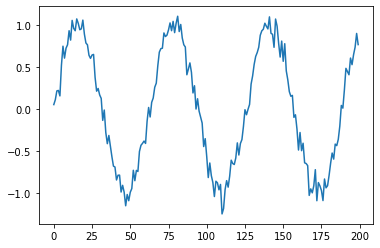

In [3]:
series = np.sin(0.1 * np.arange(200))  + np.random.randn(200) * 0.1
plt.plot(series)
plt.show()

In [4]:
# build the dataset
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [5]:
np.array(X).shape

(190, 10)

In [6]:
# sequences data -> N x T x D -> 190 x 10 x1
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10, 1), Y.shape:(190,), N.length:190


In [7]:
# build a RNN model
# 1. Input
i = Input(shape=(T,1)) # T x D
# 2. SimpleRNN(5, activation = 'relu')
x = SimpleRNN(5, activation = 'relu')(i)
# 3. Output
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse', optimizer = Adam(lr = 0.1))
# Quiz. trainable params -> 41 = hidden weights + current weights + bais
#                              = (features * unit) + (unit * unit) + (feature * unit)
#                              = (1 * 5) + (5 * 5) + (1 * 5) = 35

C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [9]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 80, validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 1s 113ms/step - loss: 3.1663 - val_loss: 0.7356
Epoch 2/80
3/3 [==============================] - 0s 22ms/step - loss: 0.6124 - val_loss: 0.7209
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.5643 - val_loss: 0.7388
Epoch 4/80
3/3 [==============================] - 0s 22ms/step - loss: 0.5443 - val_loss: 0.6922
Epoch 5/80
3/3 [==============================] - 0s 25ms/step - loss: 0.5042 - val_loss: 0.6215
Epoch 6/80
3/3 [==============================] - 0s 25ms/step - loss: 0.4519 - val_loss: 0.5300
Epoch 7/80
3/3 [==============================] - 0s 21ms/step - loss: 0.3775 - val_loss: 0.4192
Epoch 8/80
3/3 [==============================] - 0s 19ms/step - loss: 0.2680 - val_loss: 0.2999
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1904 - val_loss: 0.2347
Epoch 10/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1450 - val_loss: 0.1387
Epoch 11/80
3/3 [===========

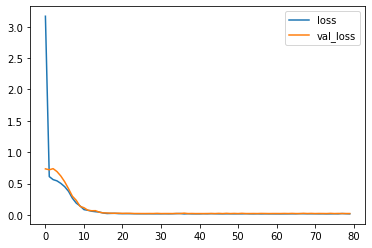

In [10]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [11]:
# Wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1,1))[0,0]
    i += 1
    
    validation_predictions.append(p)

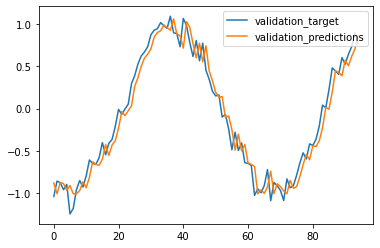

In [12]:
plt.plot(validation_target, label = 'validation_target')
plt.plot(validation_predictions, label = 'validation_predictions')
plt.legend()
plt.show()

In [13]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# lst train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1,1))[0,0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
#    print(last_x)
    last_x[-1] = p

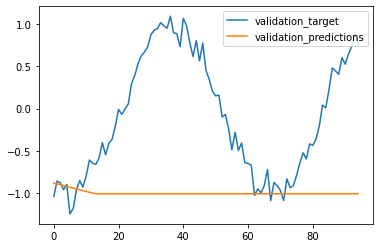

In [14]:
plt.plot(validation_target, label = 'validation_target')
plt.plot(validation_predictions, label = 'validation_predictions')
plt.legend()
plt.show()